In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
from plotnine import *

/Genomics/argo/users/ta4188/.conda/envs/xenium/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.


## tumor myeloid dataset

In [4]:
adata_ac_rna = sc.read_h5ad('processed_Rda_outputs/AC083023.10x2_RNA.h5ad')

In [5]:
adata_ac_rna

AnnData object with n_obs × n_vars = 11322 × 21885
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.mt.log2', 'nCount_HTO', 'nFeature_HTO', 'nCount_ADT', 'nFeature_ADT', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'hash.ID', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.1', 'SCT_snn_res.0.2', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.5', 'SCT_snn_res.0.6', 'SCT_snn_res.0.7', 'SCT_snn_res.0.8', 'SCT_snn_res.0.9', 'SCT_snn_res.1', 'seurat_clusters', 'Hash', 'Enrichment', 'Ab_Group', 'S.Score', 'G2M.Score', 'Phase', 'Phase2', 'Biotin_Group2', 'Biotin_Ab_Group', 'Lipstic1'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

In [6]:
adata_ac_adt = sc.read_h5ad('processed_Rda_outputs/AC083023.10x2_ADT.h5ad')

In [15]:
df = adata_ac_adt.to_df()

In [22]:
to_drop = ['Fifteen', 'Biotin', 'Flag', 'Streptavidin']
sample_df = df.drop(columns=to_drop)

In [24]:
max_values = sample_df.max(axis=1)

# Finding the columns where the maximum values occur
max_columns = sample_df.idxmax(axis=1)

# Combining the results into a single DataFrame
result = pd.DataFrame({
    'hash_max': max_values,
    'hash_id': max_columns
})

print(result)

                    hash_max   hash_id
AAACCTGAGAAGGCCT-1    1106.0    Twelve
AAACCTGAGATGAGAG-1    1983.0    Twelve
AAACCTGAGATGTGGC-1     703.0  Thirteen
AAACCTGAGCGATCCC-1     355.0    Twelve
AAACCTGAGCGTAGTG-1    4912.0      Nine
...                      ...       ...
TTTGTCAGTTGATTCG-1     775.0  Fourteen
TTTGTCATCAACACAC-1     871.0      Four
TTTGTCATCCGAAGAG-1    1193.0       Two
TTTGTCATCCGATATG-1    2195.0       Two
TTTGTCATCTGGCGTG-1    1857.0     Eight

[11322 rows x 2 columns]


In [29]:
adata_ac_rna.obs['hash_max'] = result['hash_max']
adata_ac_rna.obs['hash_id'] = result['hash_id'].astype('category')
adata_ac_rna.obs['biotin_raw'] = df['Biotin']

In [35]:
adata = adata_ac_rna

In [36]:
adata.layers['raw_counts'] = adata.X.copy()

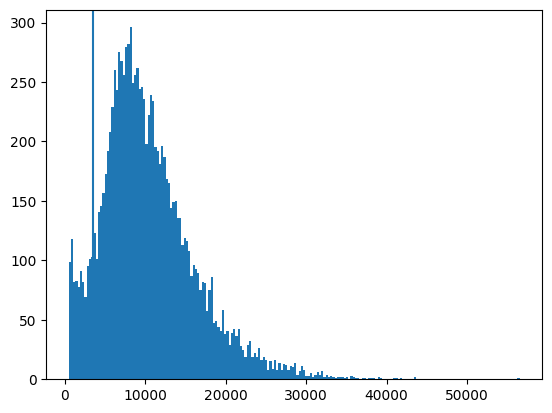

In [37]:
cell_counts = np.sum(adata.layers['raw_counts'], axis = 1)
fig = plt.hist(cell_counts, bins=200)
plt.axvline(x=3500)

<AxesSubplot: ylabel='Density'>

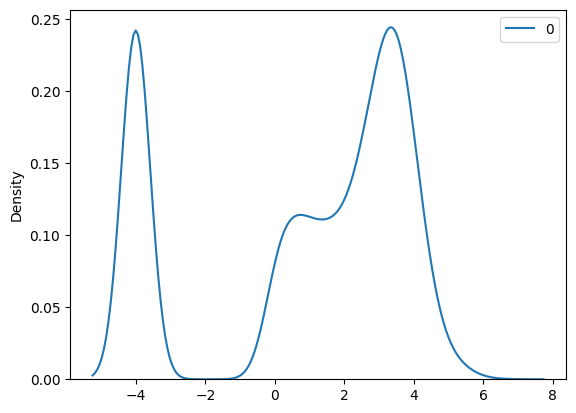

In [38]:
import seaborn as sns
gene_counts = np.sum(adata.layers['raw_counts'], axis = 0)
gene_counts.shape
gene_counts = gene_counts.T
sns.kdeplot(np.log10(gene_counts + 0.0001))

In [39]:
sc.pp.filter_cells(adata, min_counts=3500)
sc.pp.filter_genes(adata, min_counts=100)

In [40]:
adata

AnnData object with n_obs × n_vars = 10346 × 10898
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.mt.log2', 'nCount_HTO', 'nFeature_HTO', 'nCount_ADT', 'nFeature_ADT', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'hash.ID', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.1', 'SCT_snn_res.0.2', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.5', 'SCT_snn_res.0.6', 'SCT_snn_res.0.7', 'SCT_snn_res.0.8', 'SCT_snn_res.0.9', 'SCT_snn_res.1', 'seurat_clusters', 'Hash', 'Enrichment', 'Ab_Group', 'S.Score', 'G2M.Score', 'Phase', 'Phase2', 'Biotin_Group2', 'Biotin_Ab_Group', 'Lipstic1', 'hash_max', 'hash_id', 'biotin_raw', 'n_counts'
    var: 'name', 'n_counts'
    obsm: 'X_pca', 'X_umap'
    layers: 'raw_counts'

In [41]:
adata.write('processed_h5ad_outputs/lipstic_tumor_dataset_08_apr13_2024.h5ad')